In [1]:
# !pip install opencv-python
# pip install flowiz -U
import flowiz as fz
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
files = glob.glob('./img/PWCNet/*.flo')
files

['./img/PWCNet/frame_0010_forward.flo', './img/PWCNet/frame_0011_backward.flo']

(436, 1024, 2)
float32
[-6.419736  2.846248]


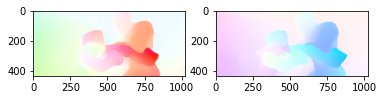

In [3]:
# Read Optical Flow image
flow1 = fz.read_flow(path=files[0])
flow2 = fz.read_flow(path=files[1])
print(flow1.shape)
print(flow1.dtype)
print(flow1[0, 0])
flow1_img = fz.convert_from_flow(flow1)
flow2_img = fz.convert_from_flow(flow2)
fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(flow1_img)
axarr[1].imshow(flow2_img)

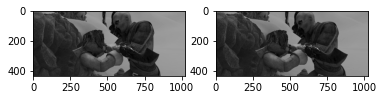

In [4]:
# Read RGB Image
img1 = cv2.imread('./img/PWCNet/frame_0010.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./img/PWCNet/frame_0011.png', cv2.IMREAD_GRAYSCALE)
# b, g, r = cv2.split(img1)
# rgb_image = cv2.merge([r, g, b])
fig1, axarr1 = plt.subplots(1, 2)
axarr1[0].imshow(img1, cmap='gray')
axarr1[1].imshow(img2, cmap='gray')
# print(img1.shape)
# print(img1.dtype)
# print(img1[0,0])

In [13]:
predicted = np.zeros(img1.shape, img1.dtype)
# loop RGB image
for x in range(img1.shape[0]):  #col
    for y in range(img1.shape[1]): # row
        flow_vector = flow1[x, y]
        new_x  = x + flow_vector[0]
        new_y = y + flow_vector[1] 
        if new_x <= img1.shape[0] and new_x >=0 and new_y>=0 and new_y <= img1.shape[1]:
            predicted[int(new_x), int(new_y)] = img1[x, y]

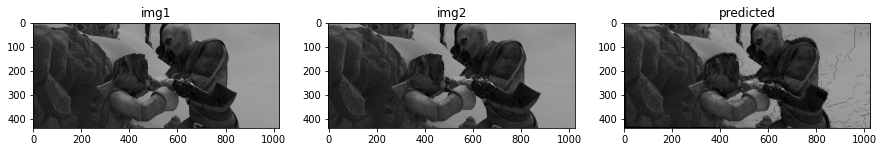

In [14]:
# plt.imshow(predicted, cmap='gray')
fig2, axarr2 = plt.subplots(1, 3)
fig2.set_size_inches(15, 5)
axarr2[0].set_title('img1')
axarr2[0].imshow(img1, cmap='gray')
axarr2[1].set_title('img2')
axarr2[1].imshow(img2, cmap='gray')
axarr2[2].set_title('predicted')
axarr2[2].imshow(predicted, cmap='gray')

In [15]:
diff = predicted -img2
diff

array([[138, 138, 228, ..., 255, 255, 126],
       [138, 138, 180, ..., 255, 255, 126],
       [137, 138, 192, ..., 255,   0, 127],
       ...,
       [226, 224, 224, ..., 255, 255, 255],
       [226, 227, 229, ...,   0,   0, 255],
       [226, 226, 228, ...,   0,   0,   0]], dtype=uint8)